In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
dfTrain=pd.read_csv('train.csv')

In [3]:
#Check numerical and non numerical columns

In [4]:
print(len(dfTrain.columns[dfTrain.dtypes=='object']))
print(len(dfTrain.columns[dfTrain.dtypes!='object']))

43
38


C:\Users\65965\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


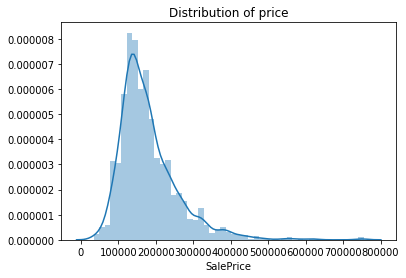

In [5]:
plt.figure()
sns.distplot(dfTrain.SalePrice)
plt.title('Distribution of price')
plt.show()

In [6]:
dfTrain['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [7]:
dfTrain.select_dtypes(include=['object']).describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


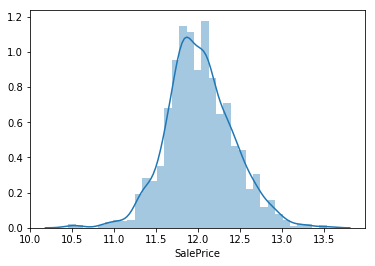

In [8]:
sns.distplot(np.log(dfTrain.SalePrice))
plt.show()

In [9]:
fig=plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

In [10]:
dfTrain.columns[dfTrain.dtypes!='object']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

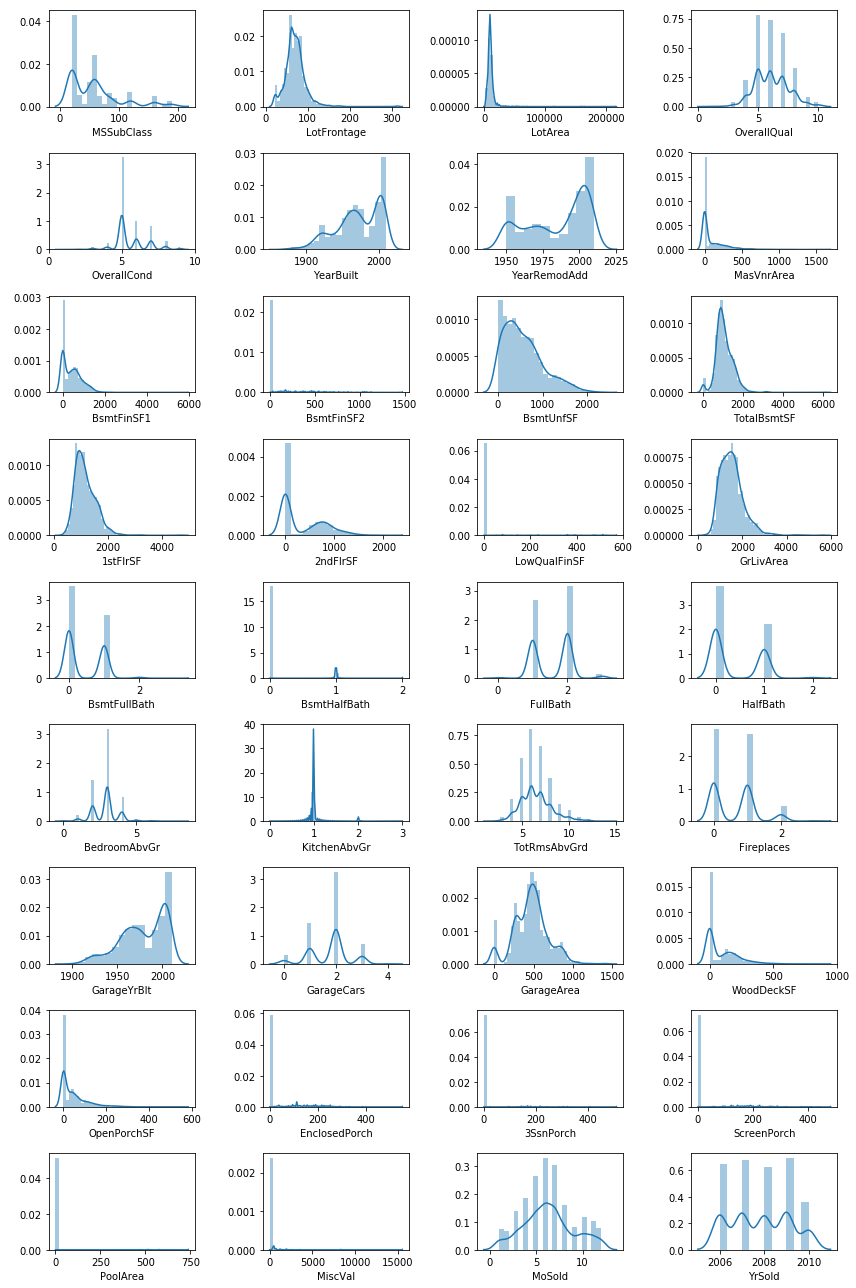

In [11]:
lstColumns=list(dfTrain.columns[dfTrain.dtypes!='object'])
lstColumns.remove('Id')
lstColumns.remove('SalePrice')
fig = plt.figure(figsize=(12,18))
for i in range(len(lstColumns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(dfTrain[lstColumns[i]].dropna())
    plt.xlabel(lstColumns[i])    
plt.tight_layout() 
plt.show()

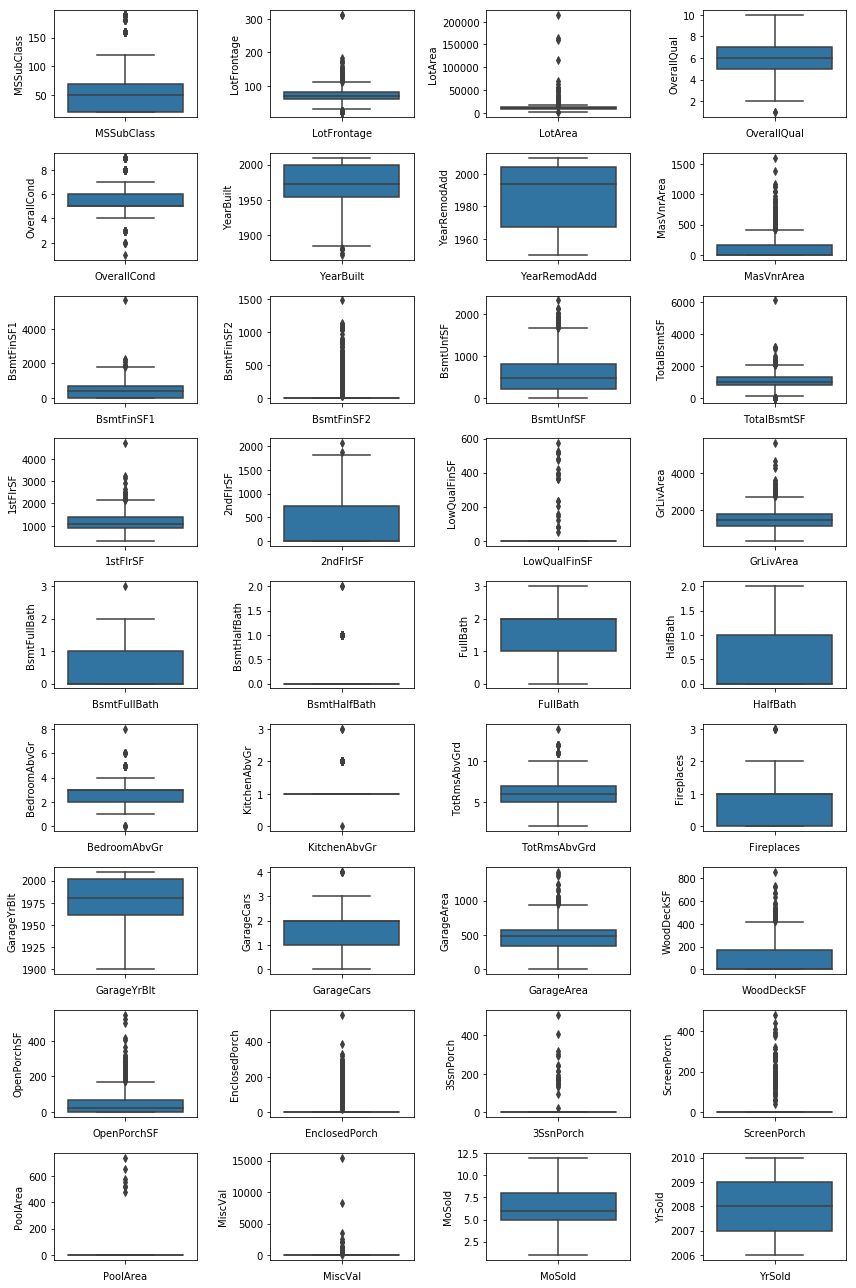

In [12]:
fig = plt.figure(figsize=(12,18))
for i in range(len(lstColumns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=dfTrain[lstColumns[i]].dropna())
    plt.xlabel(lstColumns[i])    
plt.tight_layout() 
plt.show()

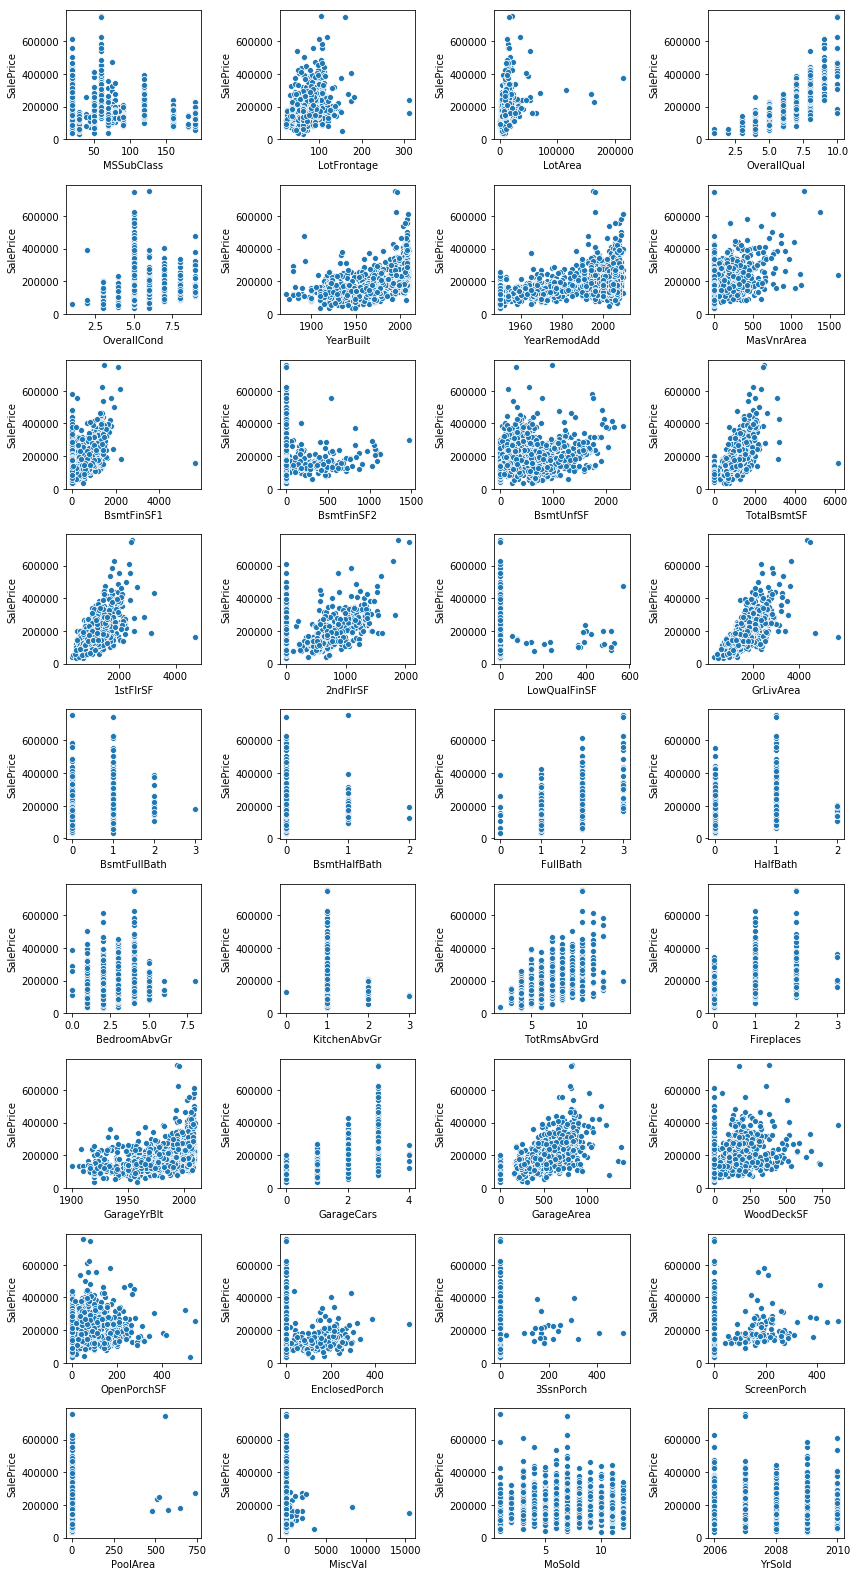

In [13]:
fig = plt.figure(figsize=(12,22))
for i in range(len(lstColumns)):
    fig.add_subplot(9,4,i+1)
    sns.scatterplot(dfTrain[lstColumns[i]].dropna(),dfTrain['SalePrice'])
plt.tight_layout() 
plt.show()

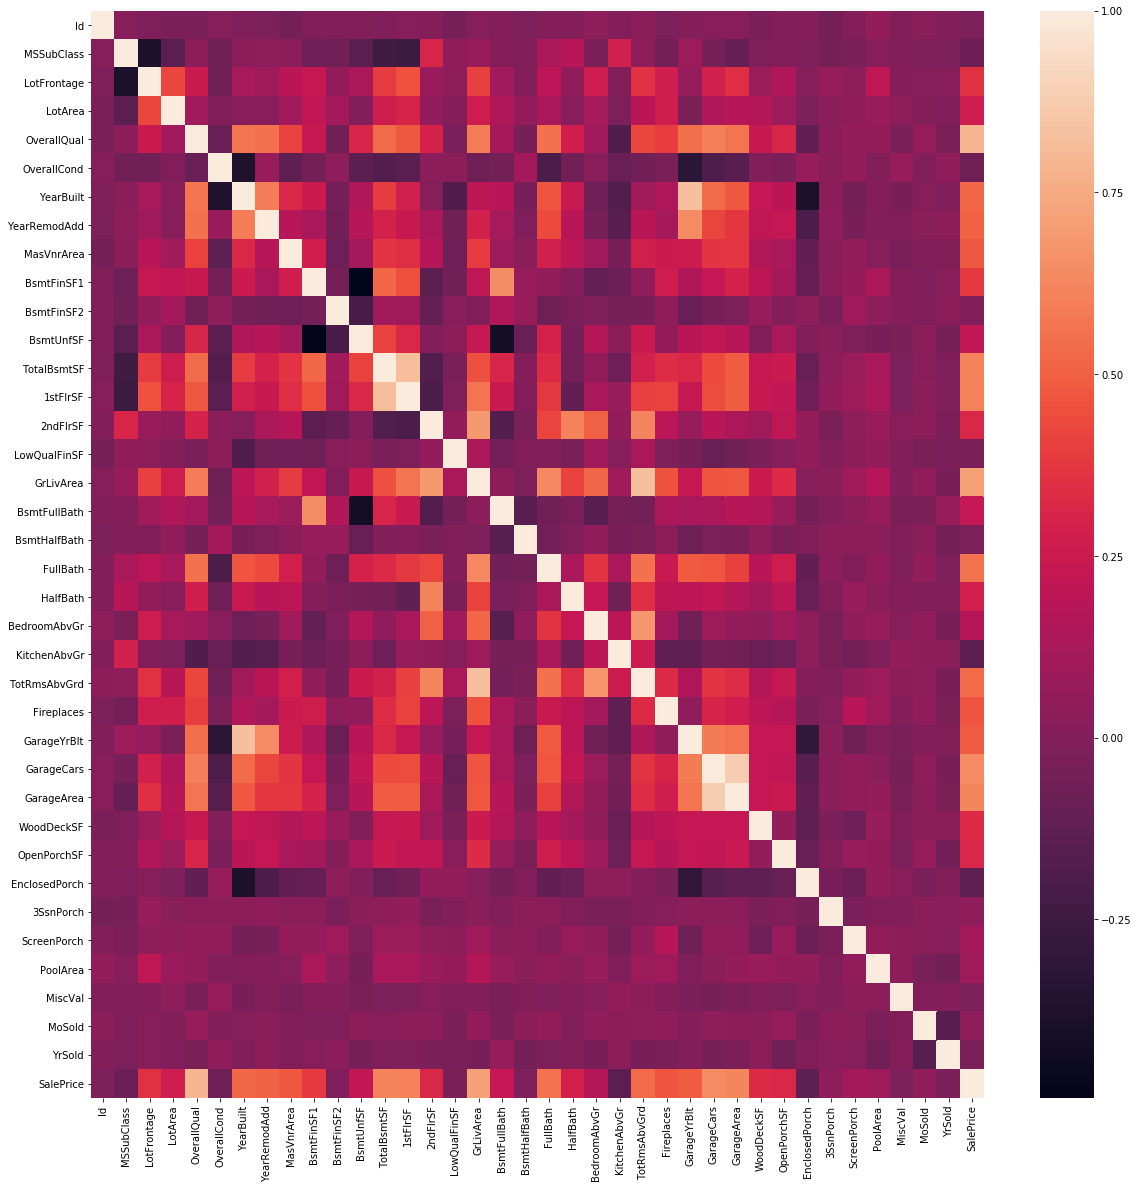

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(dfTrain.corr())

In [15]:
dfTrain.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [16]:
dfTrain.corr()['SalePrice'][dfTrain.corr()['SalePrice']>.05]

LotFrontage     0.351799
LotArea         0.263843
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
BsmtFullBath    0.227122
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
ScreenPorch     0.111447
PoolArea        0.092404
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [17]:
dfTrain[lstColumns].isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
YrSold           0
BsmtFinSF2       0
dtype: int64

In [18]:
dfTrain['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [19]:
dfTrain.corr()['SalePrice']['LotFrontage']

0.35179909657067854

In [20]:
dfTrain.shape

(1460, 81)

In [21]:
lstCatColms=dfTrain.columns[dfTrain.dtypes=='object']

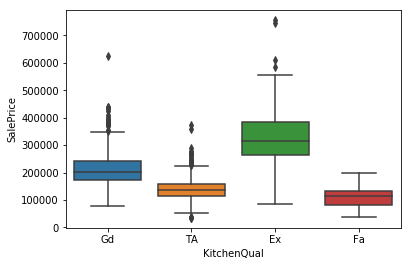

In [22]:
sns.boxplot(x=dfTrain['KitchenQual'],y=dfTrain['SalePrice'])

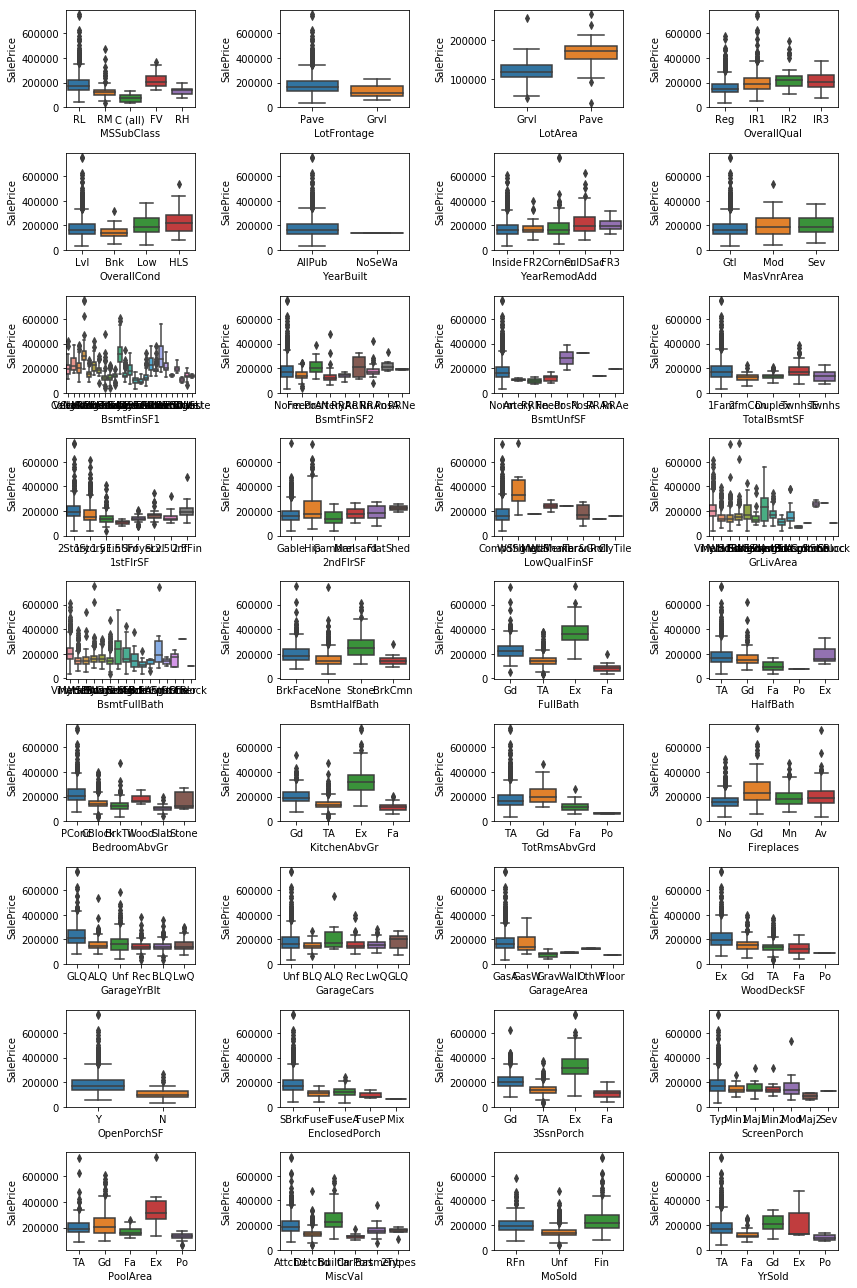

In [23]:
fig = plt.figure(figsize=(12,18))
for i in range(len(lstColumns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(x=dfTrain[lstCatColms[i]],y=dfTrain['SalePrice'])
    plt.xlabel(lstColumns[i])    
plt.tight_layout() 
plt.show()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

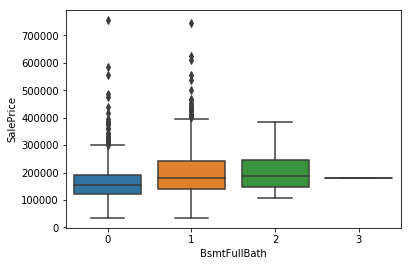

In [24]:
sns.boxplot(x=dfTrain['BsmtFullBath'],y=dfTrain['SalePrice'])
lstCatColms

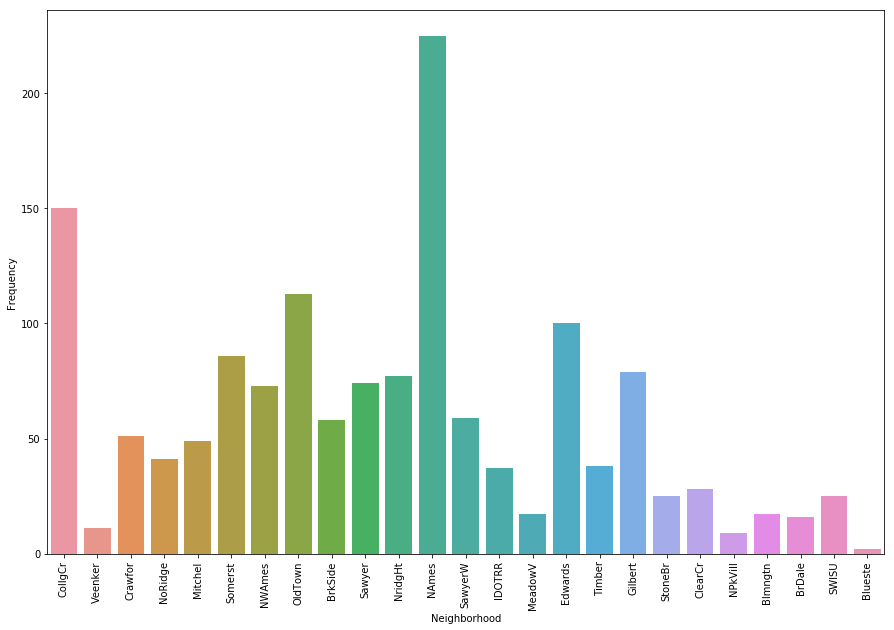

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x=dfTrain['Neighborhood'],data=dfTrain)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show() 

In [26]:
#2. Data Cleaning & Preprocessing¶

In [27]:
dfTrain.columns[dfTrain.isna().sum()>0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [28]:
lstNumColumns=list(dfTrain.columns[dfTrain.dtypes!='object'])
dfTrain[lstNumColumns].isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
BsmtFinSF1        0
LowQualFinSF      0
dtype: int64

In [29]:
dfTrain.MasVnrArea.fillna(0,inplace=True)

In [30]:
lstcatColumns=list(dfTrain.columns[dfTrain.dtypes=='object'])
dfTrain[lstcatColumns].isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

In [31]:
for i in range(len(lstcatColumns)):
    dfTrain[lstcatColumns[i]].fillna("None",inplace=True)

In [32]:
# Remove outliers based on observations on scatter plots against SalePrice:
dfTrain.drop(dfTrain['LotFrontage'][dfTrain['LotFrontage']>200].index,inplace=True)
dfTrain.drop(dfTrain['LotArea'][dfTrain['LotArea']>100000].index,inplace=True)
dfTrain.drop(dfTrain['BsmtFinSF1'][dfTrain['BsmtFinSF1']>4000].index,inplace=True)
dfTrain.drop(dfTrain['TotalBsmtSF'][dfTrain['TotalBsmtSF']>6000].index,inplace=True)
dfTrain.drop(dfTrain['1stFlrSF'][dfTrain['1stFlrSF']>4000].index,inplace=True)
dfTrain.drop(dfTrain.GrLivArea[(dfTrain['GrLivArea']>4000) & (dfTrain['SalePrice']<300000)].index,inplace=True)
dfTrain.drop(dfTrain.LowQualFinSF[dfTrain['LowQualFinSF']>550].index,inplace=True)

In [33]:
dfTrain.SalePrice=np.log(dfTrain.SalePrice)

In [34]:
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['SalePrice', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'] # high corr with other attribute

In [130]:

X=dfTrain.drop(attributes_drop,axis=1)
X = pd.get_dummies(X)
my_imputer = SimpleImputer()
X = my_imputer.fit_transform(X)

In [131]:
y=dfTrain['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [133]:
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,accuracy_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [134]:
from sklearn import model_selection
models = []
models.append(('RandomForest', RandomForestRegressor(random_state=5)))
models.append(('XGBoost', XGBRegressor(n_estimators=1000, learning_rate=0.05)))
models.append(('LinearRegression', LinearRegression()))
models.append(('Lasso', Lasso(alpha=0.0005, random_state=5)))
models.append(('Ridge', Ridge(alpha=0.002, random_state=5)))
models.append(('ElasticNet', ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)))
models.append(('GradientBoosting', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    #kfold = model_selection.KFold(n_splits=10)
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    print("{0} Accuracy {1} and MAE {2}".format(name, accuracy_score(np.round(y_test),np.round(y_predict)),mean_absolute_error(np.exp(y_predict), np.exp(y_test))))
    #print(accuracy_score(np.round(y_test),np.round(y_predict)))
    #print(mean_absolute_error(np.exp(y_predict), np.exp(y_test)))

C:\Users\65965\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest Accuracy 0.9270833333333334 and MAE 18334.166953594795
[18:37:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\65965\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBoost Accuracy 0.93125 and MAE 14351.989355468753
LinearRegression Accuracy 0.9354166666666667 and MAE 15019.451368405813
Lasso Accuracy 0.9458333333333333 and MAE 13381.412826986068
Ridge Accuracy 0.9354166666666667 and MAE 14934.87502218174
ElasticNet Accuracy 0.9145833333333333 and MAE 16213.079003348956
GradientBoosting Accuracy 0.9291666666666667 and MAE 14853.115475473584


In [119]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(X)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 0 4] TEST: [5 2]
TRAIN: [4 0 2 5] TEST: [1 3]
TRAIN: [1 2 4 0] TEST: [3 5]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [3 5 1 0] TEST: [2 4]


In [144]:
from sklearn import model_selection
models = []
models.append(('RandomForest', RandomForestRegressor(random_state=5)))
models.append(('XGBoost', XGBRegressor(n_estimators=1000, learning_rate=0.05)))
models.append(('LinearRegression', LinearRegression()))
models.append(('Lasso', Lasso(alpha=0.0005, random_state=5)))
models.append(('Ridge', Ridge(alpha=0.002, random_state=5)))
models.append(('ElasticNet', ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)))
models.append(('GradientBoosting', GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
    rs.get_n_splits(X)
    cv_results = model_selection.cross_val_score(model, X, np.round(np.exp(y)), cv=rs, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean().round(), cv_results.std().round())
    print(msg)

C:\Users\65965\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\65965\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\65965\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\65965\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\65965\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RandomForest: -719027871.000000 (60703616.000000)
[18:55:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\65965\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


KeyboardInterrupt: 

In [147]:
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(X_train, y_train)
gbr_val_predictions = gbr_model.predict(X_test)
gbr_val_mae = mean_absolute_error(np.exp(gbr_val_predictions), np.exp(y_test))

In [148]:
gbr_val_mae

14853.115475473584

In [108]:
np.round(11.002099841204238)

11.0

In [101]:
accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

0.5